# POLICY BENCHMARKS


## Test MSE gives a measure of how different the reconstructed image is of the original
## Test PSNR gives a measure of how similar they are
## Feature MSE gives a measure of how similar the model outputs are for the reconstructed image and the original. So essentially whether they are classified the same.

In [1]:
import os

import numpy as np
import torch

from torchvision import transforms

from PIL import Image

from importlib import reload

"""
    Override torch.load to transfer tensors to the cpu by default
    because it is called by np.load but np.load does not provide this functionality.
"""
reload(torch)
tl = torch.load
load_cpu = lambda *x, **y: tl(*x, **y, map_location=torch.device('cpu'))
torch.load = load_cpu


data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False
Test MSE mean, std = (0.112933025, 0.048751708)
Feature MSE mean, std = (6.3515167, 12.762136)
Test PSNR mean, std = (9.942354788780213, 2.178470231733119)
Originals: 


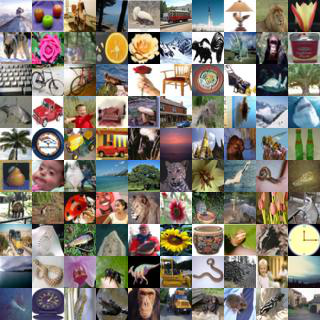

Reconstructions: 


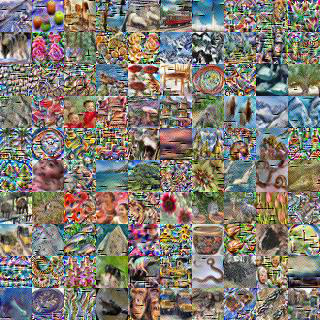

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_False
Test MSE mean, std = (0.19259799, 0.06544256)
Feature MSE mean, std = (18.702326, 40.500008)
Test PSNR mean, std = (7.477562084197998, 1.844222272538158)
Originals: 


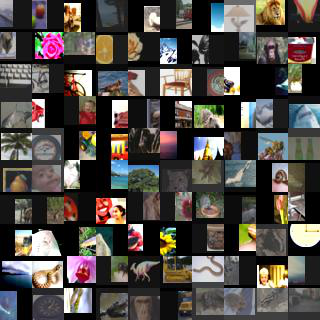

Reconstructions: 


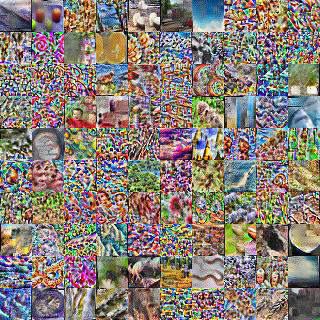

data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7_rlabel_False
Test MSE mean, std = (0.24090208, 0.046820153)
Feature MSE mean, std = (33.526417, 63.247494)
Test PSNR mean, std = (6.284170565605163, 1.0186071054117476)
Originals: 


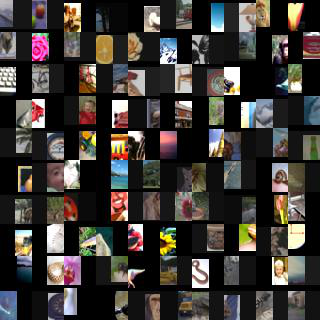

Reconstructions: 


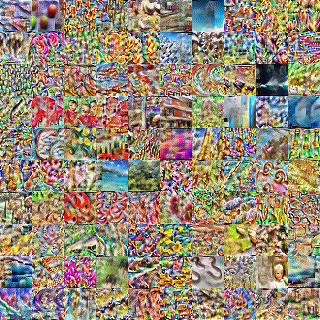

In [2]:


root = 'ATSPrivacy-Framework/benchmark/images/'

modes = os.listdir(root)

def read_images(path, prefix):
    
    for im in sorted(os.listdir(path)):
        if im[:3] == prefix:
            yield Image.open(path + '/' + im)

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

for mode in modes:
    print(mode)
    metrics = np.load(root + mode + '/metric.npy', allow_pickle=True)
    test_mse = np.array(list(m['test_mse'] for m in metrics))
    feat_mse = np.array(list(m['feat_mse'].detach().numpy() for m in metrics))
    test_psnr = np.array(list(m['test_psnr'] for m in metrics))
    print(f"Test MSE mean, std = {test_mse.mean(), test_mse.std()}")
    print(f"Feature MSE mean, std = {feat_mse.mean(), feat_mse.std()}")
    print(f"Test PSNR mean, std = {test_psnr.mean(), test_psnr.std()}")
    
    print("Originals: ")
    imgs = read_images(root + mode, 'ori')
    grid = image_grid(list(imgs), 10, 10)
    display(grid)
    
    print("Reconstructions: ")
    imgs = read_images(root + mode, 'rec')
    grid = image_grid(list(imgs), 10, 10)
    display(grid)